# Optimizing the erg of a horse using deep learning

In [1]:
# Getting the necessary inputs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('horseData.csv', low_memory=False)
print(f"Shape of dataset: {df.shape}")
df.head(10)

Shape of dataset: (69709, 24)


,name,form,rating,rawErg,erg,ems,grade,yob,sex,sire,...,ems3,grade4,bmSire,price,status,code,lot,vendor,purchaser,prev. price
0,America's Joy,UR,0,69,72,0,0,2018,F,American Pharoah,...,61,C1,Tricky Creek,8200000,Sold,KESEP,498.0,"Clarkland Farm, LLC","Whisper Hill Farm, Llc",NaN
1,Aussie Pride,W,86,80,71,0,0,2018,G,Curlin,...,57,C1,Lonhro,4100000,Sold,KESEP,274.0,"Eaton Sales, Agent for Stonestreet Bred & Raised",Godolphin,NaN
2,Lady Take Charge,UR,0,134,108,0,0,2015,F,War Front,...,68,C1,Dehere,3200000,Sold,KENOV,451.0,Eaton Sales,Whisper Hill Farm,NaN
3,Mendelssohn,G1w,101,73,73,0,0,2015,C,Scat Daddy,...,56,C1,Tricky Creek,3000000,Sold,KESEP,454.0,Clarkland Farm,M.V. Magnier,NaN
4,Serena's Harmony,UR,0,113,118,0,0,2014,F,Tapit,...,66,C1,Storm Cat,3000000,Sold,KENOV,402.0,Hill 'n' Dale Sales Agency,Bridlewood Farm,NaN
5,Brother in Arms,P,79,90,91,0,0,2018,G,War Front,...,57,C1,Proud Citizen,2900000,Sold,KESEP,258.0,"Brereton C. Jones/Airdrie Stud Inc., Agent",Godolphin,NaN
6,Sotto Voce,UR,0,83,85,0,0,2016,F,Tapit,...,55,C1,Beau Genius,2700000,Sold,KESEP,69.0,VanMeter0Gentry Sales,M.V. Magnier,NaN
7,Gun It,WG3p,97,150,150,0,0,2016,C,Tapit,...,79,C1,Medaglia d'Oro,2600000,Sold,KESEP,49.0,Taylor Made Sales Agency,Whisper Hill Farm,NaN
8,Declarationofpeace,LRw,85,127,118,0,0,2015,C,War Front,...,67,C1,Storm Cat,2600000,Sold,KENOV,423.0,Hill 'n' Dale Sales Agency,M.V. Magnier,NaN
9,Miss Besilu,WG1p,83,82,0,0,0,2011,F,Medaglia d'Oro,...,65,C1,Quiet American,2600000,Sold,KENOV,201.0,Dispersal of the Estate of Edw Evans,Besilu Stables,NaN


In [4]:
# Cleaning the data:
df = df.drop(columns=['ems', 'grade', 'grade4'], axis=1)
df

KeyError: "['ems', 'grade', 'grade4'] not found in axis"

# Basic overview of continuious variables in the dataset and visualization

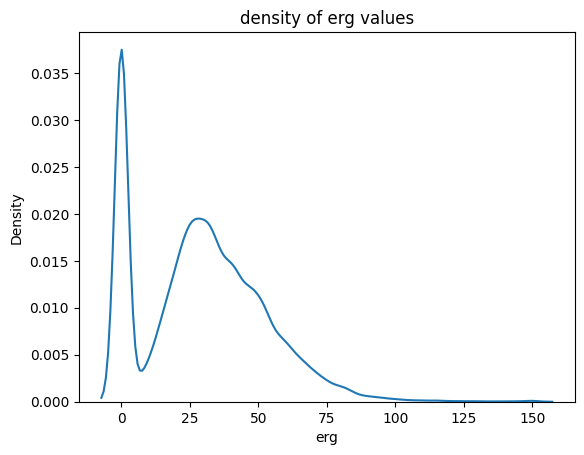

In [17]:
sns.kdeplot(data=df, x='erg')
plt.title("density of erg values")
plt.show()

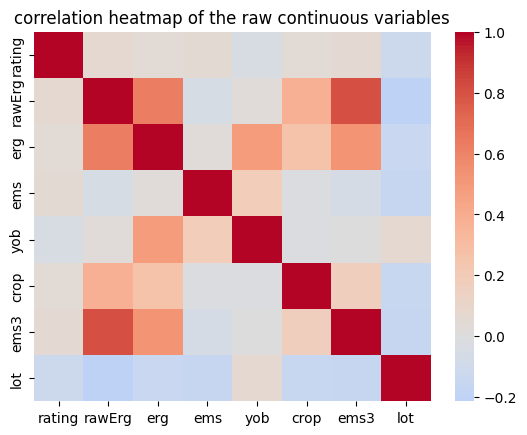

In [31]:
continuousVars = df.drop(['name', 'form', 'sex', 'sire', 'grade', 'fee','dam','form2','grade4', 'bmSire', 'price', 'status', 'code', 'vendor', 'purchaser', 'prev. price'], axis=1)
sns.heatmap(continuousVars.sample(n=1000).corr(), cmap='coolwarm', center=0)
plt.title("correlation heatmap of the raw continuous variables")
plt.show()


## Determining the number of unique values for each of the categories in the dataset.
Doing so will help us determine how to encode the categorical lables, and provide some insight into the continuous labels. 

In [33]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} has {df[col].nunique()} unique values")
    else:
        print(f"{col}: mean: {df[col].mean()}, std: {df[col].std()}")

name has 65023 unique values
form has 29 unique values
rating: mean: 46.905076819349006, std: 33.5426869938543
rawErg: mean: 38.35807428022206, std: 18.16423938436487
erg: mean: 29.33461963304595, std: 22.698397077947646
ems: mean: 1.3239897287294324, std: 6.533630234186671
grade has 8 unique values
yob: mean: 2016.1896168357027, std: 3.130053484783613
sex has 4 unique values
sire has 1044 unique values
fee has 205 unique values
crop: mean: 5.769929277424723, std: 4.665505750217208
dam has 27960 unique values
form2 has 29 unique values
ems3: mean: 41.94419658867578, std: 9.456184216351717
grade4 has 7 unique values
bmSire has 2132 unique values
price has 563 unique values
status has 4 unique values
code has 7 unique values
lot: mean: 1542.4390674318508, std: 1250.247198606075
vendor has 6091 unique values
purchaser has 13276 unique values
prev. price has 396 unique values


In [34]:
# converting the categorical variables to numerical values using target encoding for diverse categories and lebel encoding for smaller categories